# GLASS IDENTIFICATION

Importing all the required libries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from scipy import stats
from scipy.stats import skew,boxcox
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [124]:
df=pd.read_csv('glass.csv',names=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Downloding the dataset

## Exploring Data Variables

In [125]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [126]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [127]:
df.type

1      1
2      1
3      1
4      1
5      1
      ..
210    7
211    7
212    7
213    7
214    7
Name: type, Length: 214, dtype: int64

In [271]:
df.sample(4)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
132,0.422742,2.617396,0.00,0.307485,4.266054,0.19,2.598235,0.00,0.10,2
199,0.415620,2.665838,0.00,0.978326,4.291828,0.04,2.206074,0.64,0.00,7
99,0.416662,2.539237,2.88,0.536493,4.293332,0.73,2.144761,0.00,0.00,2
129,0.419158,2.606387,2.09,0.512824,4.279163,0.53,2.258633,0.27,0.17,2


In [129]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

In [130]:
df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type']

In [131]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
type      int64
dtype: object

There are two different types of data (int64 and float64) present in the dataset

In [132]:
df.isnull()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False


In [133]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

We have no null values in this dataset

<AxesSubplot:>

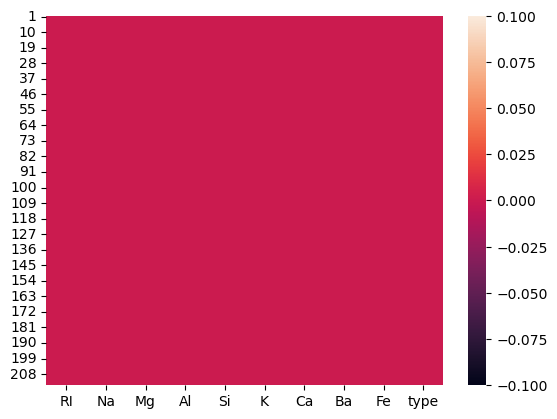

In [134]:
sns.heatmap(df.isnull())

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [136]:
df.shape

(214, 10)

In [137]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

In [138]:
df['RI'].unique()

array([1.52101, 1.51761, 1.51618, 1.51766, 1.51742, 1.51596, 1.51743,
       1.51756, 1.51918, 1.51755, 1.51571, 1.51763, 1.51589, 1.51748,
       1.51784, 1.52196, 1.51911, 1.51735, 1.5175 , 1.51966, 1.51736,
       1.51751, 1.5172 , 1.51764, 1.51793, 1.51721, 1.51768, 1.51747,
       1.51775, 1.51753, 1.51783, 1.51567, 1.51909, 1.51797, 1.52213,
       1.51779, 1.5221 , 1.51786, 1.519  , 1.51869, 1.52667, 1.52223,
       1.51898, 1.5232 , 1.51926, 1.51808, 1.51837, 1.51778, 1.51769,
       1.51215, 1.51824, 1.51754, 1.51905, 1.51977, 1.52172, 1.52227,
       1.52099, 1.52152, 1.523  , 1.51574, 1.51848, 1.51593, 1.51631,
       1.5159 , 1.51645, 1.51627, 1.51613, 1.51592, 1.51646, 1.51594,
       1.51409, 1.51625, 1.51569, 1.5164 , 1.51841, 1.51605, 1.51588,
       1.51629, 1.5186 , 1.51689, 1.51811, 1.51655, 1.5173 , 1.5182 ,
       1.52725, 1.5241 , 1.52475, 1.53125, 1.53393, 1.52222, 1.51818,
       1.52664, 1.52739, 1.52777, 1.51892, 1.51847, 1.51846, 1.51829,
       1.51708, 1.51

In [139]:
df['RI'].nunique()

178

In [140]:
df['Na'].nunique()

142

In [141]:
df['Mg'].nunique()

94

In [142]:
df['Al'].nunique()

118

In [143]:
df['Si'].nunique()

133

In [144]:
df['K'].nunique()

65

In [145]:
df['Ca'].nunique()

143

In [146]:
df['Ba'].nunique()

34

In [147]:
df['Fe'].unique()

array([0.  , 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14, 0.22, 0.06, 0.3 ,
       0.16, 0.1 , 0.09, 0.31, 0.03, 0.12, 0.32, 0.15, 0.2 , 0.34, 0.28,
       0.08, 0.29, 0.21, 0.18, 0.25, 0.35, 0.37, 0.51, 0.05, 0.01])

In [148]:
df['Fe'].nunique()

32

In [149]:
df['Fe'].unique()

array([0.  , 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14, 0.22, 0.06, 0.3 ,
       0.16, 0.1 , 0.09, 0.31, 0.03, 0.12, 0.32, 0.15, 0.2 , 0.34, 0.28,
       0.08, 0.29, 0.21, 0.18, 0.25, 0.35, 0.37, 0.51, 0.05, 0.01])

In [150]:
df['type'].nunique()

6

In [151]:
df['type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [152]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
9.57    4
8.79    

In [153]:
df.nunique().to_frame('No of unique values')

,No of unique values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
type,6


In [154]:
df.shape

(214, 10)

## Data Visualization¶

### Univariate Analysis

<AxesSubplot:xlabel='RI'>

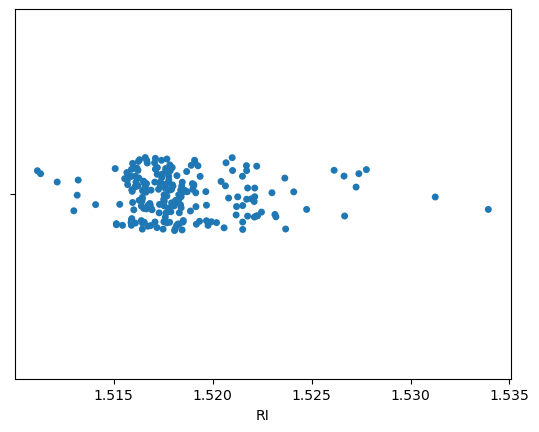

In [155]:
sns.stripplot(df['RI'])

<AxesSubplot:xlabel='Na'>

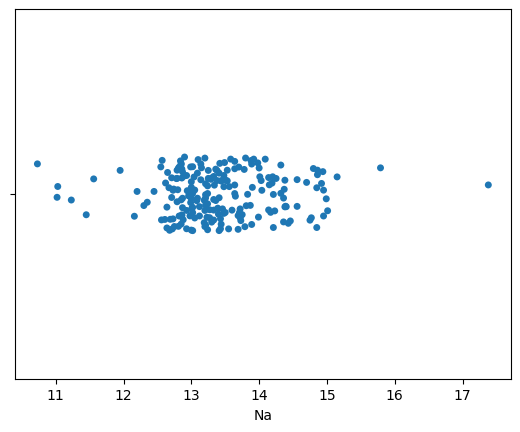

In [156]:
sns.stripplot(df['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Count'>

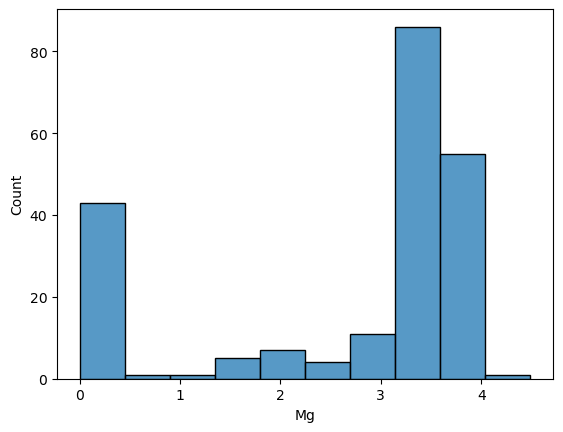

In [157]:
sns.histplot(df['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Count'>

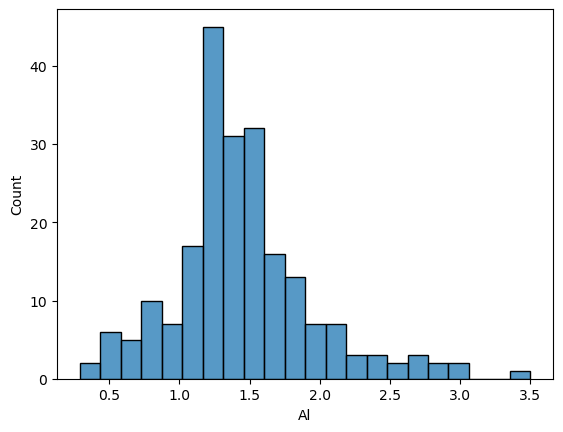

In [158]:
sns.histplot(df['Al'])

<AxesSubplot:xlabel='Si', ylabel='Count'>

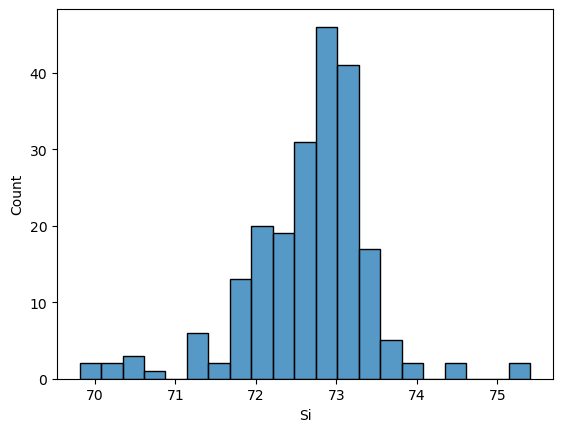

In [159]:
sns.histplot(df['Si'])

<AxesSubplot:xlabel='K', ylabel='Count'>

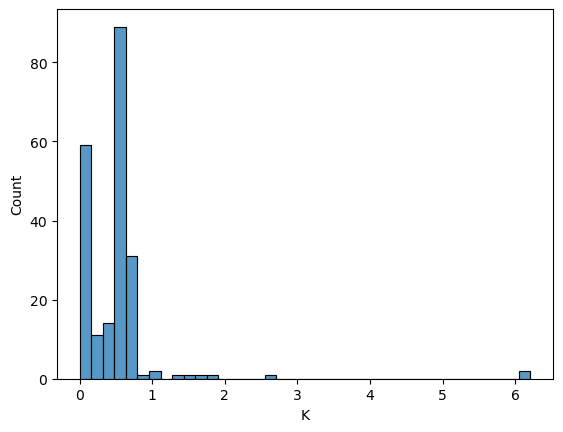

In [160]:
sns.histplot(df['K'])

<AxesSubplot:xlabel='Ca', ylabel='Count'>

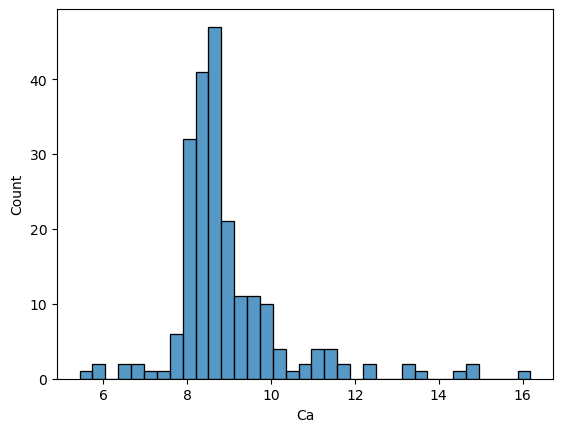

In [161]:
sns.histplot(df['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Count'>

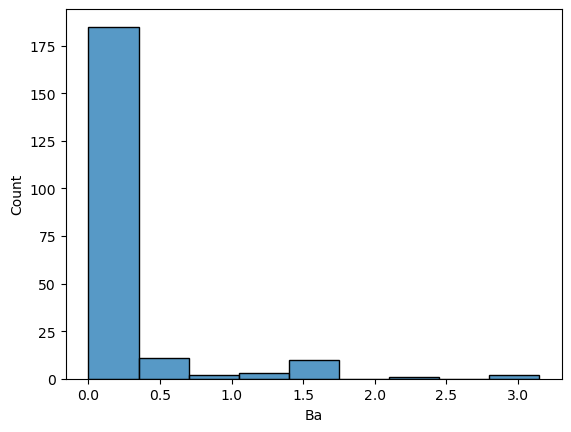

In [162]:
sns.histplot(df['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Count'>

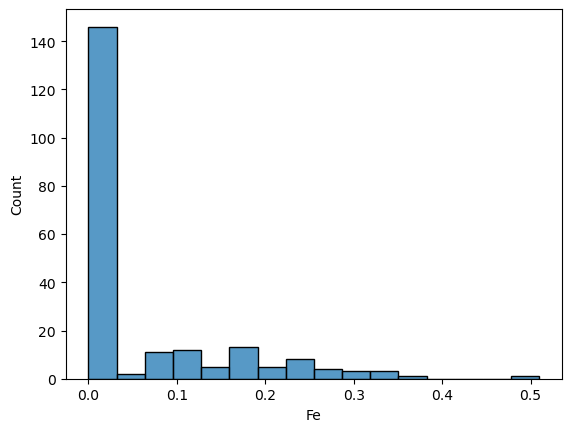

In [163]:
sns.histplot(df['Fe'])

<AxesSubplot:xlabel='type', ylabel='count'>

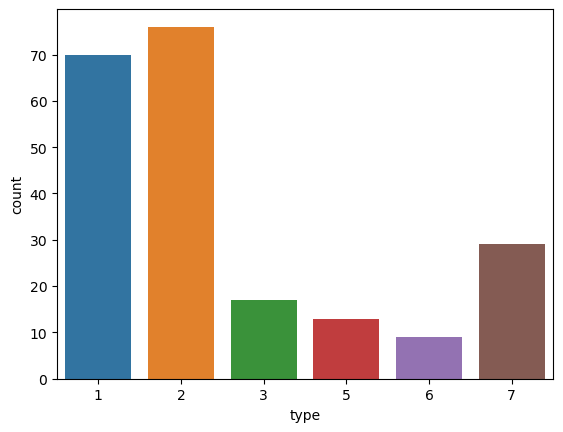

In [164]:
sns.countplot(df['type'])

In [165]:
corr=df.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

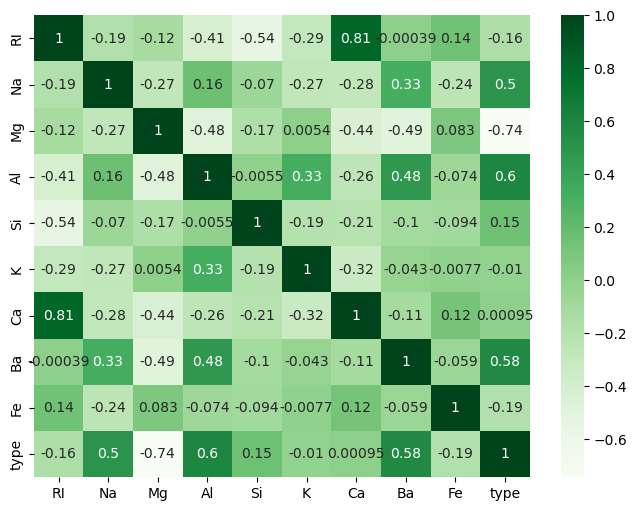

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='Greens',annot=True)

Key Observations

We observe that the mg column is negetively correlating with type variable

Na,Ba and Al columns are moderately correlating with type

### Multivariate Analysis

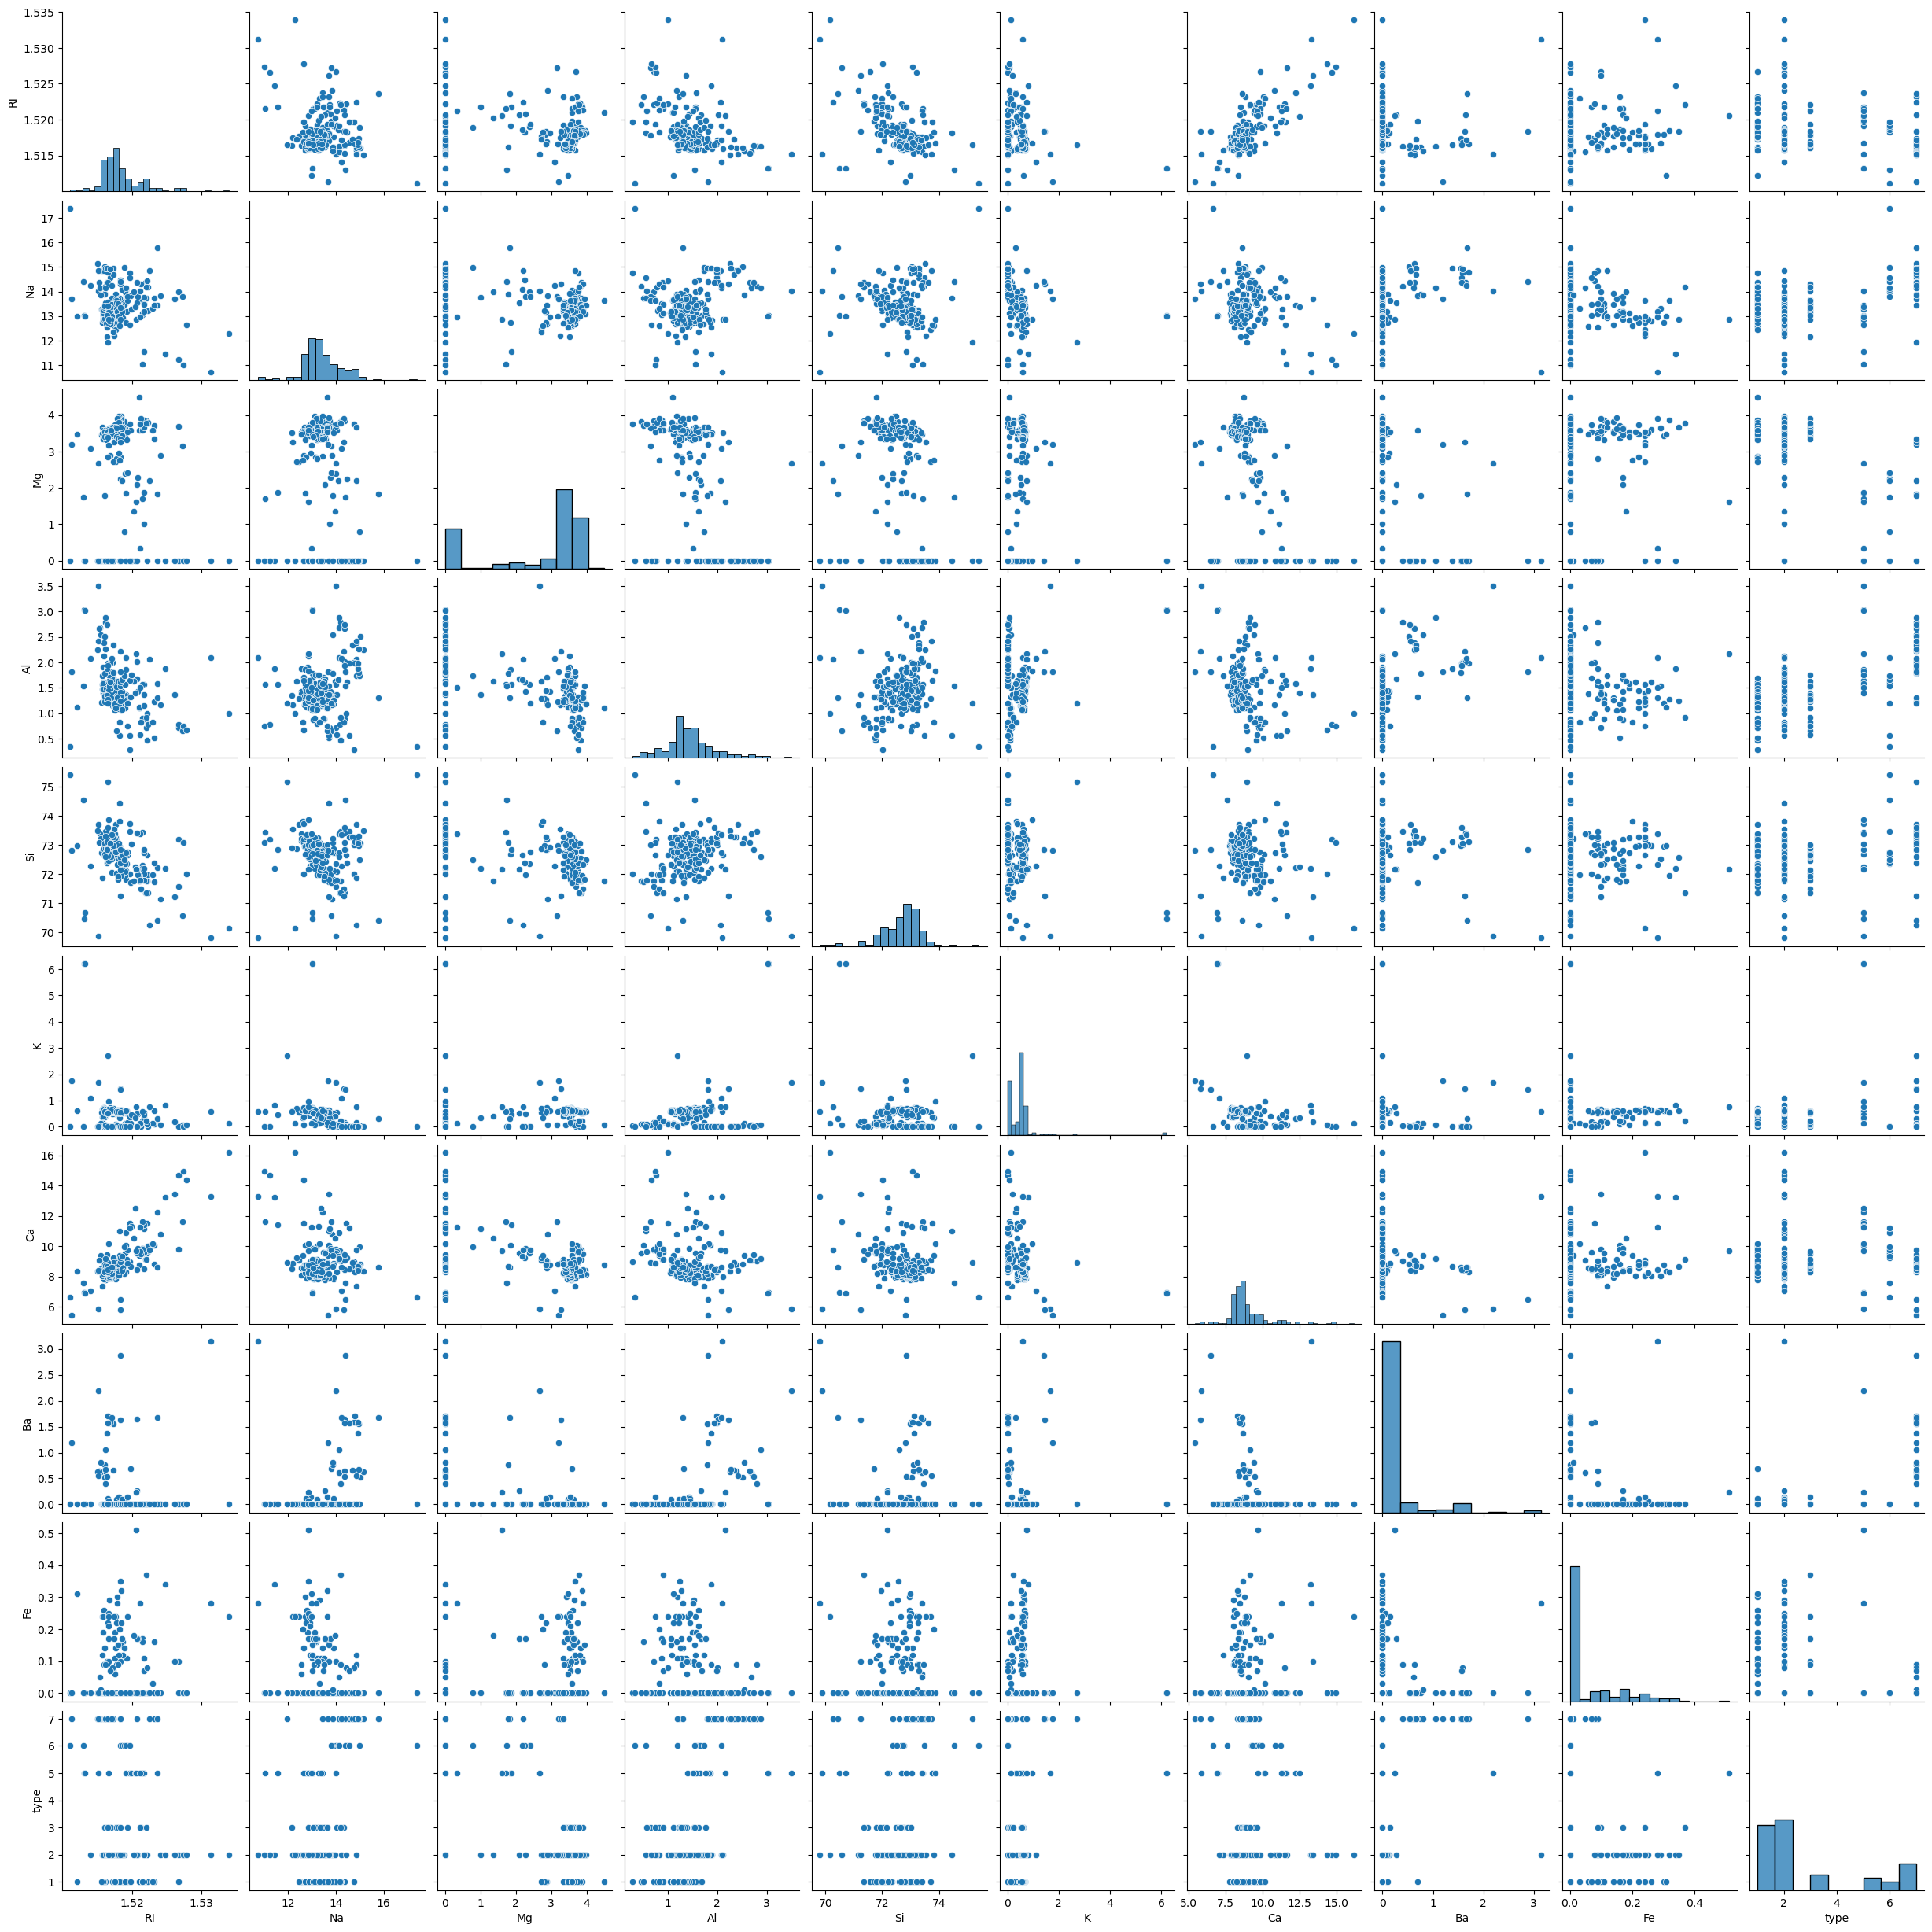

In [167]:
sns.pairplot(df)

### Bivariate Analysis

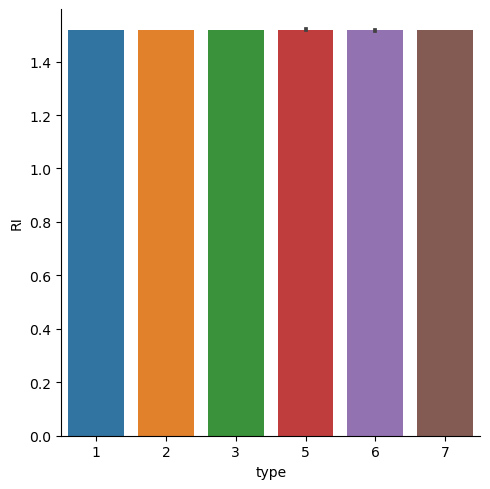

In [168]:
sns.catplot(x='type',y='RI',data=df,kind='bar')

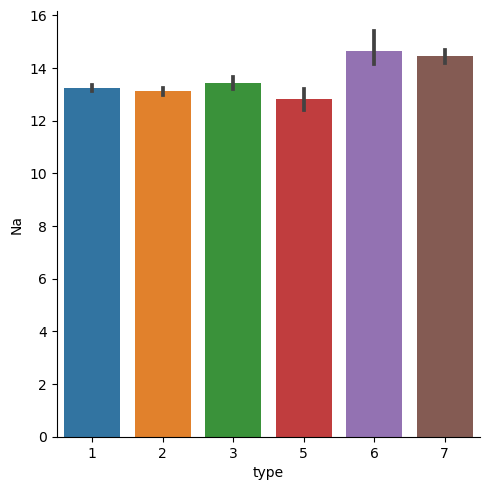

In [169]:
sns.catplot(x='type',y='Na',data=df,kind='bar')

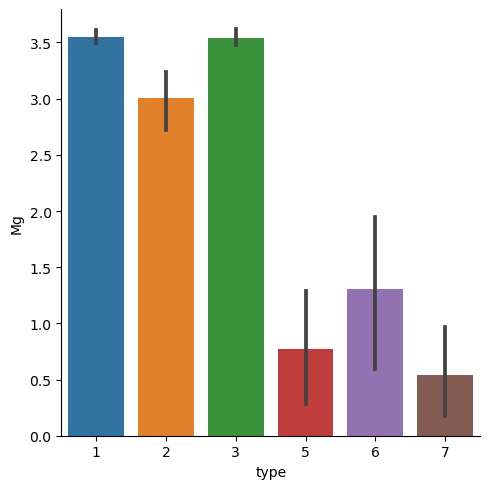

In [170]:
sns.catplot(x='type',y='Mg',data=df,kind='bar')

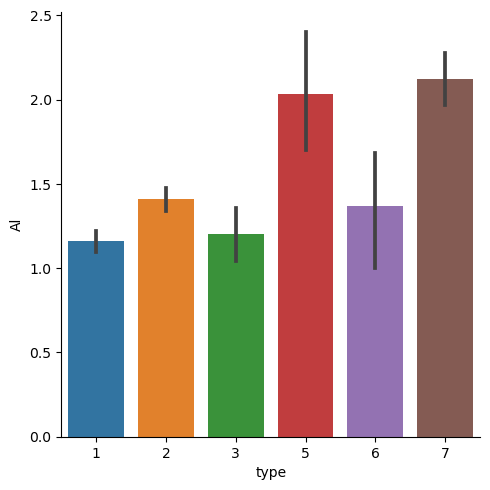

In [171]:
sns.catplot(x='type',y='Al',data=df,kind='bar')

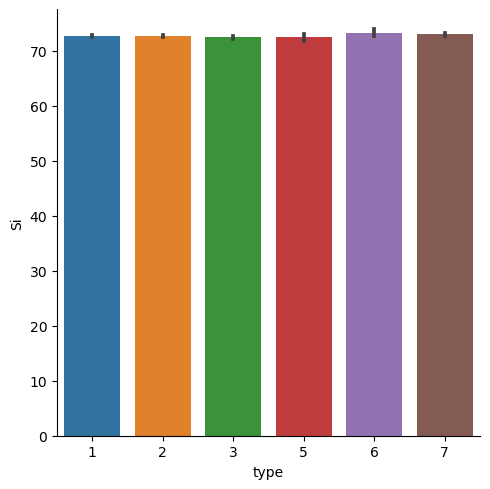

In [172]:
sns.catplot(x='type',y='Si',data=df,kind='bar')

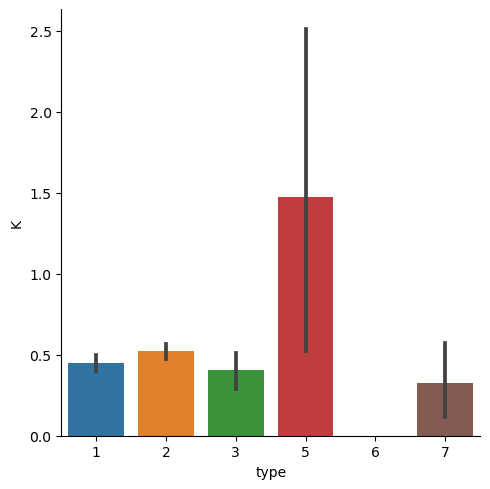

In [173]:
sns.catplot(x='type',y='K',data=df,kind='bar')

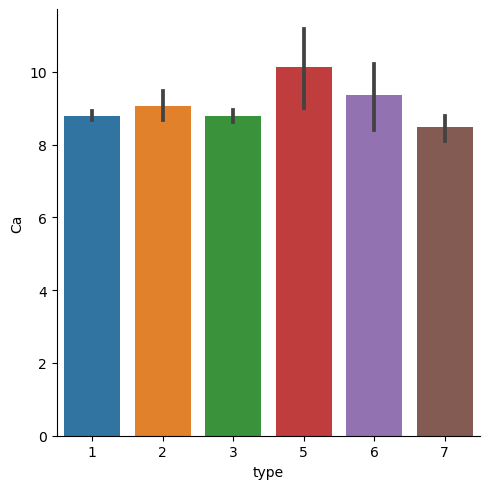

In [174]:
sns.catplot(x='type',y='Ca',data=df,kind='bar')

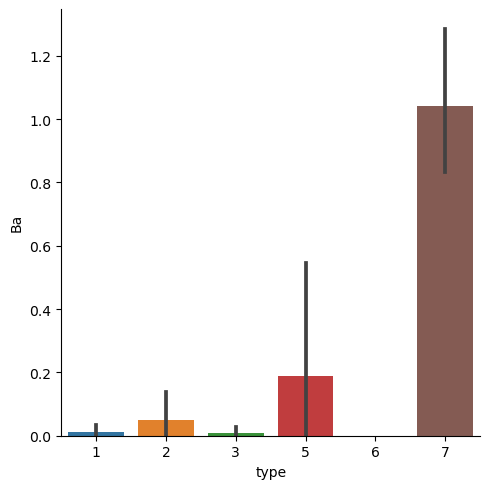

In [175]:
sns.catplot(x='type',y='Ba',data=df,kind='bar')

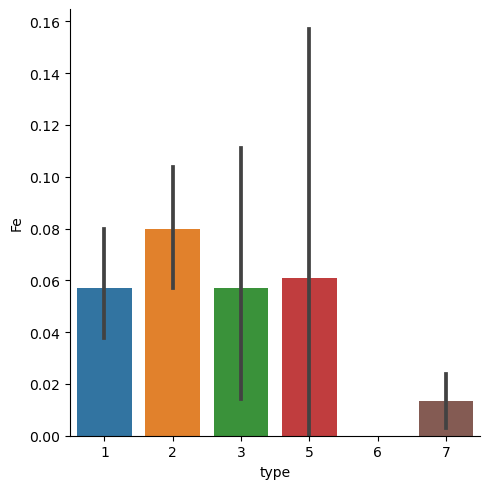

In [176]:
sns.catplot(x='type',y='Fe',data=df,kind='bar')

## Description of Dataset

In [177]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Key Observation

Mean value of Mg, K, Ba has is very low than 50% showing that skewness is present in the columns.

The difference between maximum value and 75% in Ca column is high.

The Na and Si column has higher std deviation showing the data is highly spreaded

### Plotting Outliers

RI         AxesSubplot(0.125,0.53;0.133621x0.35)
Na      AxesSubplot(0.285345,0.53;0.133621x0.35)
Mg       AxesSubplot(0.44569,0.53;0.133621x0.35)
Al      AxesSubplot(0.606034,0.53;0.133621x0.35)
Si      AxesSubplot(0.766379,0.53;0.133621x0.35)
K          AxesSubplot(0.125,0.11;0.133621x0.35)
Ca      AxesSubplot(0.285345,0.11;0.133621x0.35)
Ba       AxesSubplot(0.44569,0.11;0.133621x0.35)
Fe      AxesSubplot(0.606034,0.11;0.133621x0.35)
type    AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

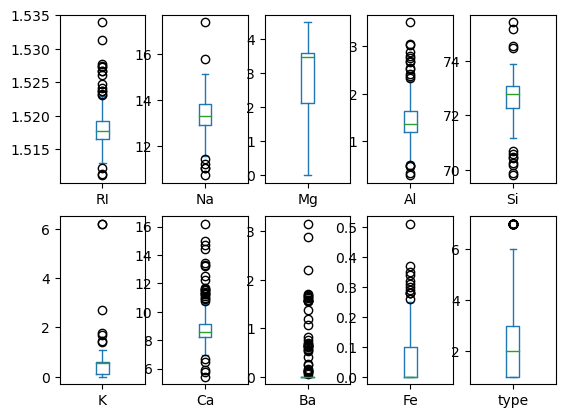

In [178]:
df.plot(kind='box',subplots=True,layout=(2,5))

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8485a0220>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8485a0760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c848786e50>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8485a0d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8485a0fd0>],
 'means': []}

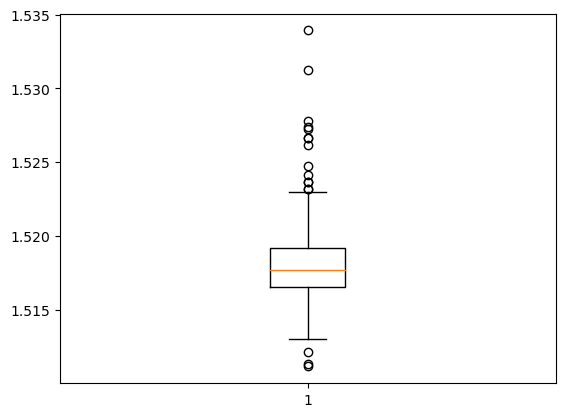

In [179]:
plt.boxplot(df['RI'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8485f2c70>,
 'caps': [<matplotlib.lines.Line2D at 0x2c848602250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8485f2ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8486027f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c848602ac0>],
 'means': []}

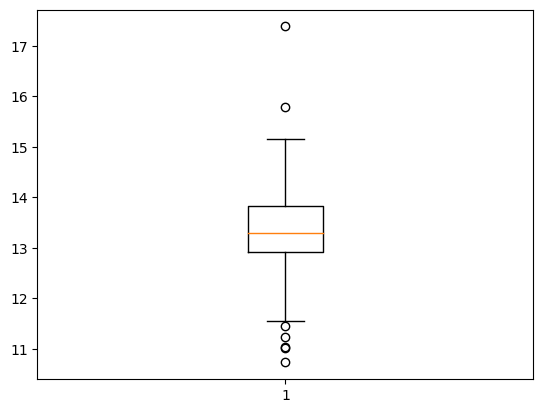

In [180]:
plt.boxplot(df['Na'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8486602e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c848660880>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c848651fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c848660e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c84866e130>],
 'means': []}

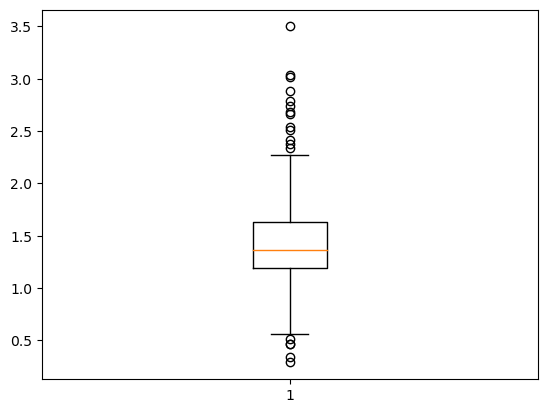

In [181]:
plt.boxplot(df['Al'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8486bda30>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8486bdfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8486bd760>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8486cc5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8486cc880>],
 'means': []}

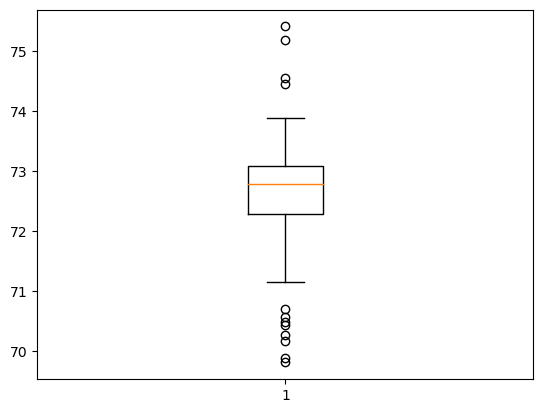

In [182]:
plt.boxplot(df['Si'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8498eec40>,
 'caps': [<matplotlib.lines.Line2D at 0x2c84977f220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8498ee970>],
 'medians': [<matplotlib.lines.Line2D at 0x2c84977f7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c84977fa90>],
 'means': []}

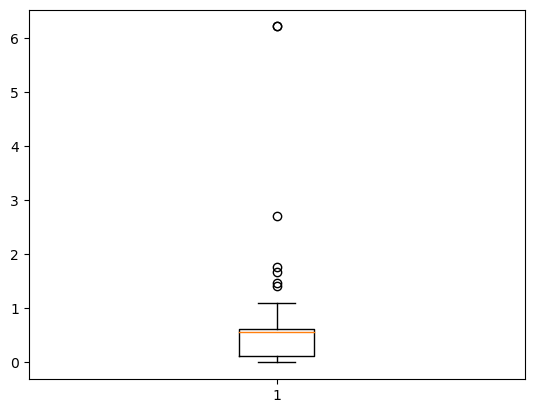

In [183]:
plt.boxplot(df['K'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c8497df3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8497df970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c8497df100>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8497dff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8497ea220>],
 'means': []}

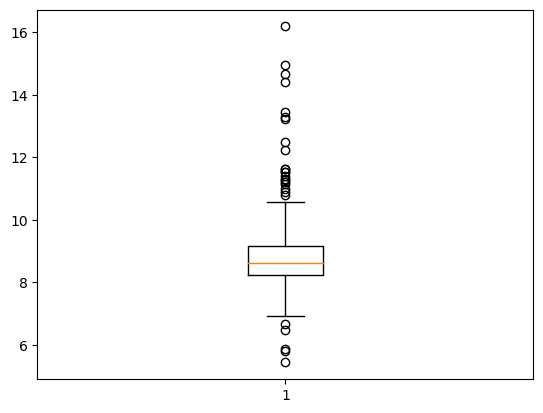

In [184]:
plt.boxplot(df['Ca'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c849840460>,
 'caps': [<matplotlib.lines.Line2D at 0x2c849840a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c849840190>],
 'medians': [<matplotlib.lines.Line2D at 0x2c849840fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c84984d2b0>],
 'means': []}

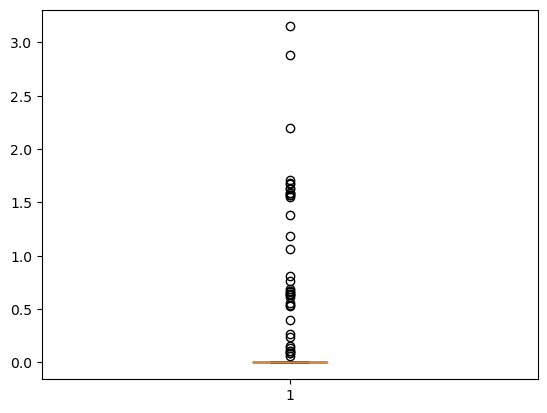

In [185]:
plt.boxplot(df['Ba'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c84989ebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c8498ad190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c84989e8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c8498ad730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c8498ada00>],
 'means': []}

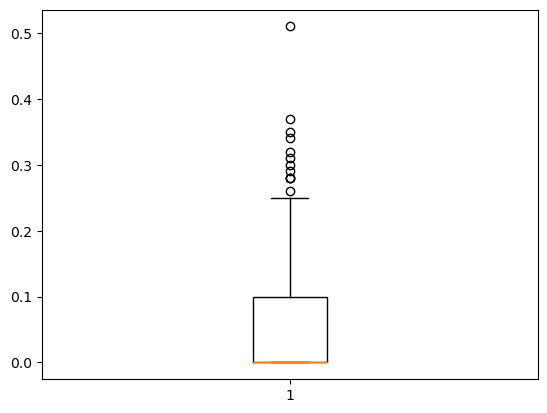

In [186]:
plt.boxplot(df['Fe'])

### Checking Skewness

In [187]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
type    1.114915
dtype: float64

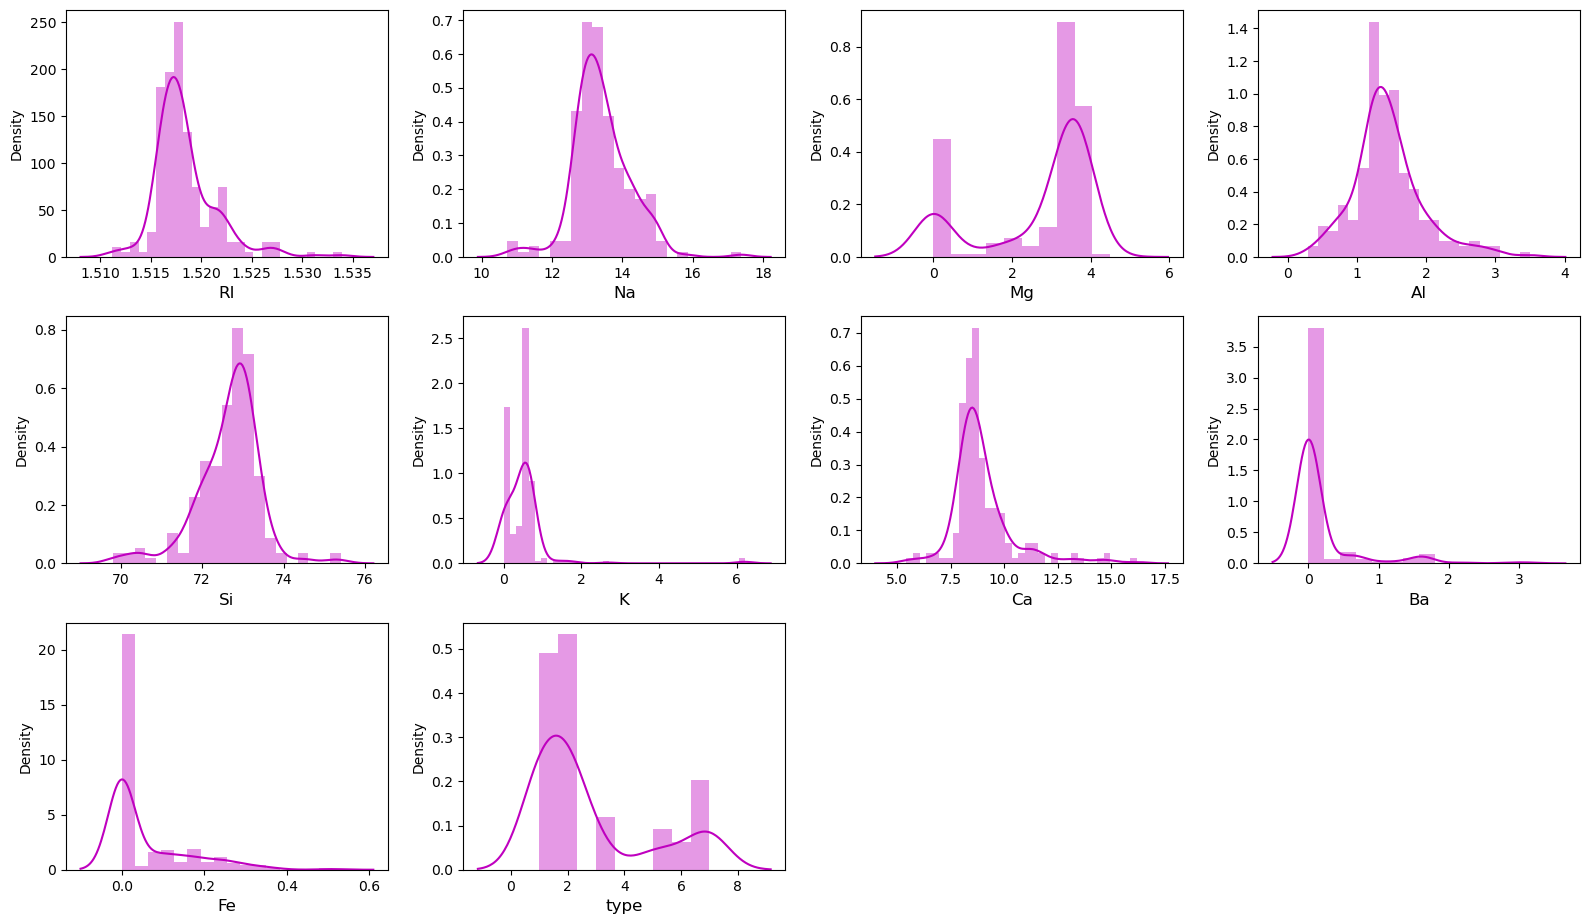

In [188]:
plt.figure(figsize=(16,12))
plotnumber=1
for i in df.columns:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='RI', ylabel='Density'>

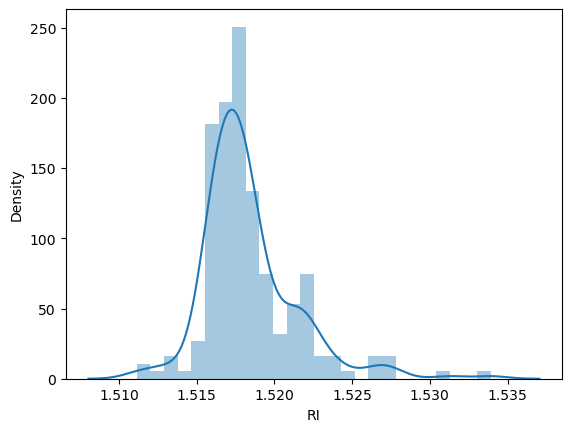

In [189]:
sns.distplot(df['RI'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

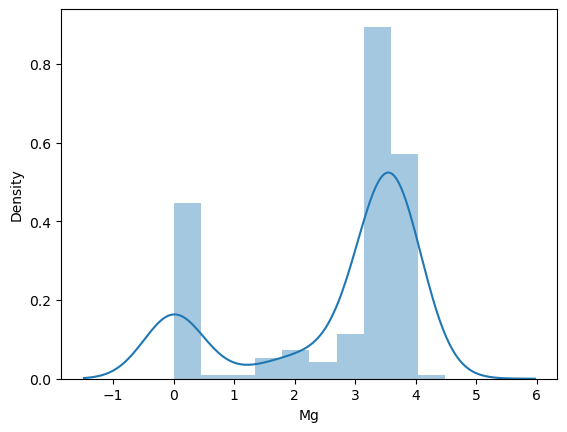

In [190]:
sns.distplot(df['Mg'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

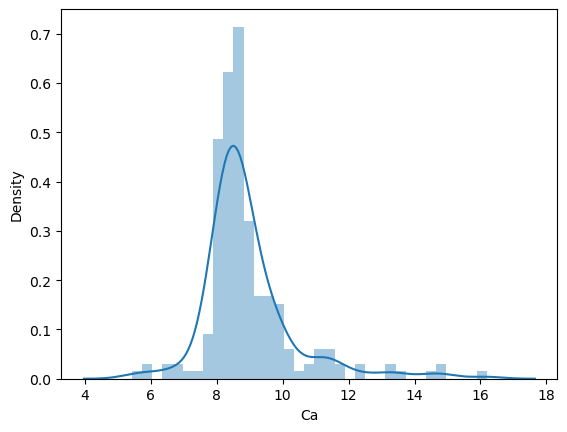

In [191]:
sns.distplot(df['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

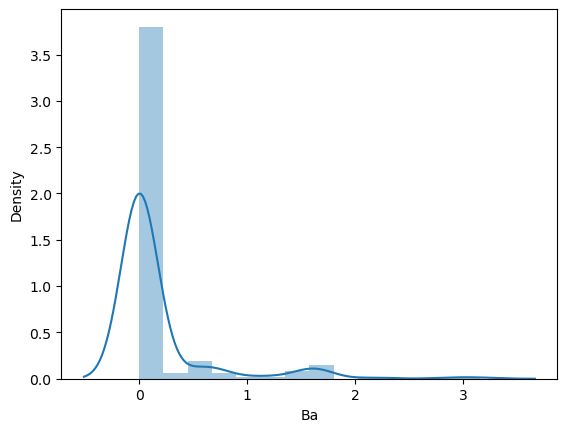

In [192]:
sns.distplot(df['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

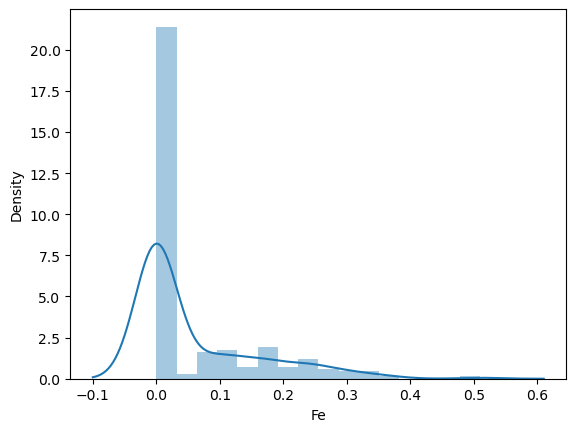

In [193]:
sns.distplot(df['Fe'])

<AxesSubplot:xlabel='Al', ylabel='Density'>

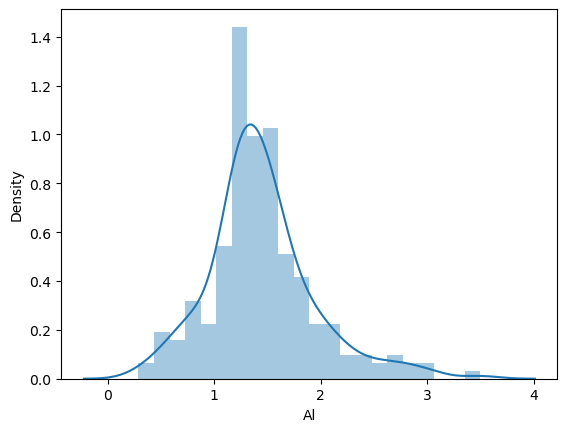

In [194]:
sns.distplot(df['Al'])

In [204]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
type    1.114915
dtype: float64

In [ ]:
skewed_features = ['RI', 'Na','Al', 'Ca']


The RI, Na, Al, Ca columns are skewed

In [205]:
for feature in skewed_features:
    skewness = skew(df[feature])
    print(f"Skewness of {feature}: {skewness}")

Skewness of RI: 1.6140150456619853
Skewness of Na: 0.4509917200116132
Skewness of Al: 0.9009178781425268
Skewness of Ca: 2.0326773755262475
Skewness of Si: -0.7253172664513229


In [206]:
for feature in skewed_features:
    df[feature] = np.log(df[feature])

In [207]:
for feature in skewed_features:
    skewness = skew(df[feature])
    print(f"Skewness of {feature} after transformation: {skewness}")

Skewness of RI after transformation: 1.6015381256414503
Skewness of Na after transformation: 0.03408507605840953
Skewness of Al after transformation: -0.8405381230695977
Skewness of Ca after transformation: 1.058874363913115
Skewness of Si after transformation: -0.7943981930713471


## Separating to x and y data¶

In [215]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
1,0.419375,2.613007,4.49,0.095310,4.273606,0.06,2.169054,0.00,0.0,1
2,0.417137,2.631169,3.60,0.307485,4.286754,0.48,2.057963,0.00,0.0,1
3,0.416194,2.604909,3.55,0.431782,4.290322,0.39,2.051556,0.00,0.0,1
4,0.417170,2.580974,3.69,0.254642,4.285103,0.57,2.106570,0.00,0.0,1
5,0.417012,2.585506,3.62,0.215111,4.291555,0.55,2.088153,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,0.416227,2.649008,0.00,1.057790,4.285103,0.08,2.217027,1.06,0.0,7
211,0.416636,2.702703,0.00,0.688135,4.291281,0.00,2.128232,1.59,0.0,7
212,0.419138,2.664447,0.00,0.703098,4.296196,0.00,2.132982,1.64,0.0,7
213,0.416412,2.665838,0.00,0.662688,4.298781,0.00,2.137710,1.57,0.0,7


In [216]:
x=df.iloc[:,:-1]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,0.419375,2.613007,4.49,0.095310,4.273606,0.06,2.169054,0.00,0.0
2,0.417137,2.631169,3.60,0.307485,4.286754,0.48,2.057963,0.00,0.0
3,0.416194,2.604909,3.55,0.431782,4.290322,0.39,2.051556,0.00,0.0
4,0.417170,2.580974,3.69,0.254642,4.285103,0.57,2.106570,0.00,0.0
5,0.417012,2.585506,3.62,0.215111,4.291555,0.55,2.088153,0.00,0.0
...,...,...,...,...,...,...,...,...,...
210,0.416227,2.649008,0.00,1.057790,4.285103,0.08,2.217027,1.06,0.0
211,0.416636,2.702703,0.00,0.688135,4.291281,0.00,2.128232,1.59,0.0
212,0.419138,2.664447,0.00,0.703098,4.296196,0.00,2.132982,1.64,0.0
213,0.416412,2.665838,0.00,0.662688,4.298781,0.00,2.137710,1.57,0.0


In [217]:
y=df.iloc[:,-1:]

In [218]:
y

,type
1,1
2,1
3,1
4,1
5,1
...,...
210,7
211,7
212,7
213,7


### Spliting the data for training and testing¶

In [219]:
# splitting the data into 76% training and 24% testing
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=43)

In [220]:
x_train.shape

(171, 9)

In [221]:
x_test.shape

(43, 9)

In [222]:
y_train.shape

(171, 1)

In [223]:
y_test.shape

(43, 1)

### Feature Scalling

In [224]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [225]:
# Fit the scaler to the training data
scaler.fit(x_train)

StandardScaler()

In [233]:
# Transform the training and testing data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [227]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [228]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
bc=BaggingClassifier()
et=ExtraTreesClassifier()

In [240]:
print('Accuracy score, Confusion Matrix and Classification Report for different models')
models=[lg,gnb,svc,dtc,knn,add,rf,gb,bc,et]
best_accuracy=0
best_model=None
for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
    m.fit(x_train_scaled,y_train)
    pred=m.predict(x_test_scaled)
    
    #Evaluate the model
    accuracy=accuracy_score(y_test,pred)
    print('accuracy score of',m)
    print(round((accuracy_score(y_test,pred)),3))
    print('Confusion Matrix of',m)
    print(confusion_matrix(y_test,pred))
    print('Classification Report of',m)
    print(classification_report(y_test,pred))
    print('\n')
    
    if accuracy>best_accuracy:
        best_model=m
        best_accuracy=accuracy
        best_pred=pred
        
#Print the best model and its accuracy
print('\nBest performing model:',best_model)
print('Accuracy Score:',round(best_accuracy,3))

Accuracy score, Confusion Matrix and Classification Report for different models
accuracy score of LogisticRegression()
0.662
Confusion Matrix of LogisticRegression()
[[14  4  1  0  0  0]
 [ 7 15  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 0  3  0  2  0  1]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0 10]]
Classification Report of LogisticRegression()
              precision    recall  f1-score   support

           1       0.61      0.74      0.67        19
           2       0.62      0.65      0.64        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.67      0.67      0.67         3
           7       0.83      1.00      0.91        10

    accuracy                           0.66        65
   macro avg       0.62      0.56      0.56        65
weighted avg       0.65      0.66      0.64        65



accuracy score of GaussianNB()
0.308
Confusion Matrix of GaussianNB()
[[ 0  1 18  0  0  0]
 [ 1  4 15  1  1  1]
 [ 1

### Cross Validation Score

In [248]:
from sklearn.model_selection import cross_val_score
models=[lg,gnb,svc,dtc,knn,add,rf,gb,bc,et]
for m in models:
    score=cross_val_score(m,x,y,cv=5)
    print(m,'score is:')
    print(round(score.mean(),3))

    m.fit(x_train_scaled, y_train)
    pred=m.predict(x_test_scaled)
    print('Difference between Accuracy score and cross validation score is - ',round(accuracy_score(y_test,pred)-score.mean(),3))
    print('\n')

LogisticRegression() score is:
0.528
Difference between Accuracy score and cross validation score is -  0.133


GaussianNB() score is:
0.341
Difference between Accuracy score and cross validation score is -  -0.033


SVC() score is:
0.458
Difference between Accuracy score and cross validation score is -  0.265


DecisionTreeClassifier() score is:
0.547
Difference between Accuracy score and cross validation score is -  0.13


KNeighborsClassifier() score is:
0.604
Difference between Accuracy score and cross validation score is -  0.058


AdaBoostClassifier() score is:
0.341
Difference between Accuracy score and cross validation score is -  0.166


RandomForestClassifier() score is:
0.697
Difference between Accuracy score and cross validation score is -  0.057


GradientBoostingClassifier() score is:
0.678
Difference between Accuracy score and cross validation score is -  0.107


BaggingClassifier() score is:
0.612
Difference between Accuracy score and cross validation score is -  0.049


Observations:

If we observe the difference between the cross val score and accuracy then Random forest is the best model

### Hyper parameter tuning

In [257]:
#Optimizing the data using Hyper Paramete Tuning
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
bc = BaggingClassifier()

# Define the hyperparameters to tune
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_samples': [0.5, 1.0],
              'max_features': [0.5, 1.0]}

# Define the grid search
grid_search = GridSearchCV(bc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 50}
Best score: 0.7648275862068965


Using the above parameters to further improve the performance of BaggingClassifier

In [259]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate a BaggingClassifier model with the best parameters
bagging_clf = BaggingClassifier(n_estimators=50, max_samples=1.0, max_features=0.5)

# Train the model on the training data
bagging_clf.fit(x_train_scaled, y_train)

# Make predictions on the testing data
pred = bagging_clf.predict(x_test_scaled)

# Evaluate the performance of the model
print("Accuracy score:", accuracy_score(y_test, pred))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))
print("Classification report:\n", classification_report(y_test, pred))
print('Accuracy:',acc*100)

Accuracy score: 0.7538461538461538
Confusion matrix:
 [[18  1  0  0  0  0]
 [ 5 15  0  1  1  1]
 [ 4  0  0  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]
Classification report:
               precision    recall  f1-score   support

           1       0.67      0.95      0.78        19
           2       0.79      0.65      0.71        23
           3       0.00      0.00      0.00         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.75        65
   macro avg       0.64      0.68      0.65        65
weighted avg       0.72      0.75      0.72        65

Accuracy: 80.0


In [249]:
#Optimizing the data using Hyper Paramete Tuning
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.7443678160919539


Using the above parameters to further improve the performance of Random Forest

In [255]:
# create a new instance of the Random Forest model
final_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=2)

# train the model on the entire training dataset
final_model.fit(x_train_scaled, y_train)

# Evaluate the performance of the model on the test set
pred=final_model.predict(x_test_scaled)
print('Accuracy:',accuracy_score(y_test, pred))
print('Confusion Matrix:', confusion_matrix(y_test, pred))
print('Classification Report:', classification_report(y_test, pred))
print('Accuracy:',acc*100)

Accuracy: 0.8
Confusion Matrix: [[17  2  0  0  0  0]
 [ 4 17  1  1  0  0]
 [ 2  0  2  0  0  0]
 [ 0  3  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0 10]]
Classification Report:               precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.77      0.74      0.76        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00        10

    accuracy                           0.80        65
   macro avg       0.82      0.77      0.79        65
weighted avg       0.80      0.80      0.79        65

Accuracy: 80.0


In [270]:
p=np.array([1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0])
p=p.reshape(1,-1)
final_model.predict(p)

array([7], dtype=int64)

In [272]:
p=np.array([0.416662,2.539237,2.88,0.536493,4.293332,0.73,2.144761,0.00,0.00])
p=p.reshape(1,-1)
final_model.predict(p)

array([2], dtype=int64)

### Plotting ROC and compare AUC for all the models used

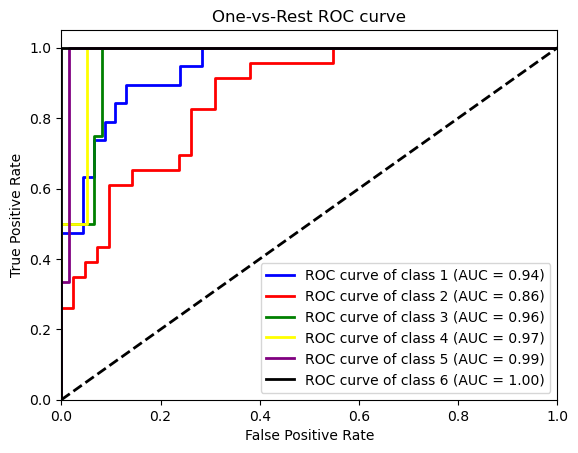

In [265]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the target variable
y_bin = label_binarize(y, classes=[1, 2, 3, 5, 6, 7])
n_classes = y_bin.shape[1]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.3, random_state=42)

# Train a random forest classifier with the best hyperparameters found earlier
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
rf_ovr = OneVsRestClassifier(rf)
rf_ovr.fit(x_train, y_train)

# Compute the probabilities for each class for the test set
y_score = rf_ovr.predict_proba(x_test)

# Compute the AUC-ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the AUC-ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC curve')
plt.legend(loc="lower right")
plt.show()

In [273]:
#Since the Model without Outliers performing best! We will select that DataFrame.
#Saving the Model
import joblib
joblib.dump(final_model,'finalfile.obj')

['finalfile.obj']